In [1]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [2]:
sns.set()
plt.rcParams['figure.figsize'] = (17.0,8.0) # set default size of plots
plt.style.use('seaborn-deep')
plt.rcParams['font.family'] = 'serif'

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [3]:
def atleast_one(p,wanted_prob):
    if 0<p<=1 and 0<=wanted_prob<=1:
        n=math.ceil(math.log(1-wanted_prob,1-p))
        print(f'Assuming that {p*100}% products are defective we need\033[1m {n}\033[0m samples to get a {wanted_prob*100}% probability of having at least one \ndefective product.')
        return n
atleast_one(0.03,0.85) ; 

Assuming that 3.0% products are defective we need 63 samples to get a 85.0% probability of having at least one 
defective product.


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [4]:
atleast_one(0.04,0.95);

Assuming that 4.0% products are defective we need 74 samples to get a 95.0% probability of having at least one 
defective product.


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [5]:
def atleast_n(k,p,wanted_prob):  
    if 0<p<=1 and 0<=wanted_prob<=1 and k>=0:
        p_list = [0] * (k-1)
        p_sum=0;n=k
        while p_sum<wanted_prob:# p(x>=k)=1-p(x<=k-1) => at least k = 1-at most(k-1)
            p_sum=0
            for i in range(k):
                p_sum+=(1-p)**(n-i)*p**i*(math.factorial(n)/(math.factorial(i)*(math.factorial(n-i))))
            n+=1;p_sum=1-p_sum
            p_list.append(p_sum)
        print(f'Assuming that {p*100}% products are defective ,we need\033[1m {n-1}\033[0m samples to get a {wanted_prob*100}% probability of having at least {k} \ndefective product.\n')
        return p_list

In [6]:
plista=atleast_n(5,0.1,0.9);
plistb=atleast_n(15,0.3,0.9);

Assuming that 10.0% products are defective ,we need 78 samples to get a 90.0% probability of having at least 5 
defective product.

Assuming that 30.0% products are defective ,we need 64 samples to get a 90.0% probability of having at least 15 
defective product.



<BarContainer object of 64 artists>

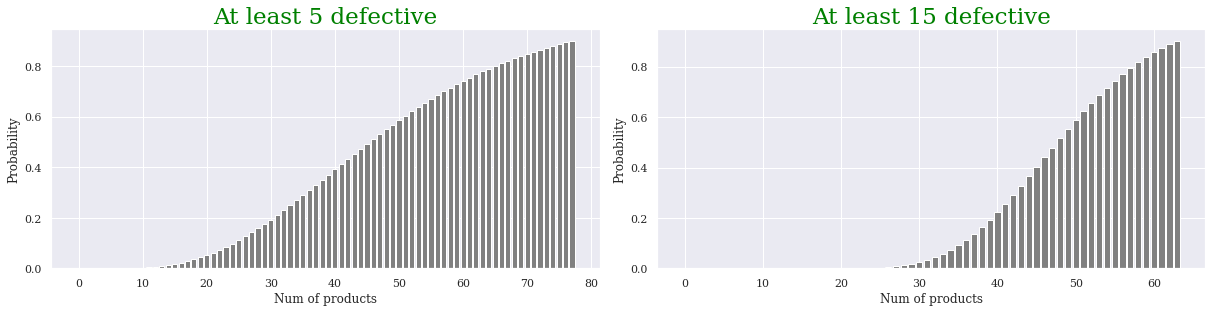

In [7]:
fig, ax = plt.subplots(1, 2, tight_layout=True)
ax[0]=plt.subplot(2,2,1)
ax[0].bar(np.arange(len(plista)),plista,color='gray')
ax[0].set_title('At least 5 defective',size=23, color='green');ax[0].set_xlabel('Num of products');ax[0].set_ylabel('Probability')
ax[1]=plt.subplot(2,2,2)
ax[1].set_title('At least 15 defective',size=23,color='green');ax[1].set_xlabel('Num of products'); ax[1].set_ylabel('Probability'); 
ax[1].bar(np.arange(len(plistb)),plistb,color='gray')

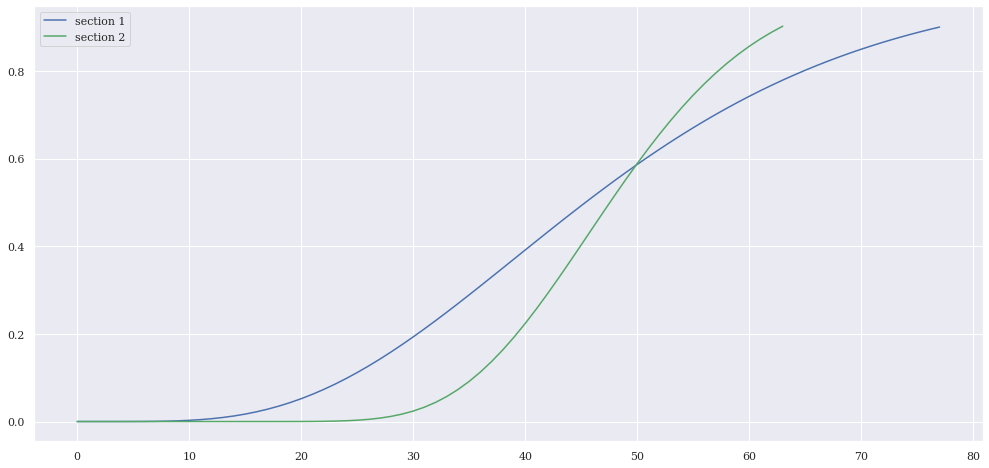

In [8]:
x1 = np.arange(len(plista));x2 = np.arange(len(plistb))
plt.plot(x1,plista,label='section 1');plt.plot(x2,plistb, label='section 2')
plt.legend();plt.show()

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [9]:
def city_dist(min_,max_,popu,mean_,median_):
    np.random.seed(1);citya= np.random.randint(min_, median_, popu//2);
    np.random.seed(1);cityb= np.random.randint(median_, max_, popu//2);
    city=np.sort(np.concatenate((citya,cityb),axis=None)); city[popu//2-1]=median_;city[popu//2]=median_;
    if city.mean() <mean_:
        i=popu//2 +1
        while city.mean()<mean_:
            city[i]*=2;i+=1
    else:
        i=popu//2 +1;
        while city.mean()>mean_:
            city[i]= city[i]/8+median_ ;i+=4
    return city

def hist_plot(SH1,RG1,xlabel):        
    fig, axs = plt.subplots(1, 2, tight_layout=True)
    axs[0].hist(SH1, bins=np.arange(min(SH1), max(SH1) + 100, 100));
    axs[0].set_title('SH City',size=23);axs[0].set_xlabel(xlabel);
    axs[0].axvline(SH1.mean(), color='r', linestyle='--', linewidth=3)
    axs[0].axvline(np.median(SH1), color='g', linestyle='--', linewidth=3)
    min_ylim, max_ylim = axs[0].get_ylim(); min_xlim, max_xlim = axs[0].get_xlim()
    axs[0].text(SH1.mean()*1.01, max_ylim*0.9,f'mean: {int(SH1.mean())}' ,color='r',size=12,bbox=dict(facecolor='white', alpha=0.9))
    axs[0].text(np.median(SH1)*1.01, max_ylim*0.8,f'median: {int(np.median(SH1))}' ,color='g',size=12,bbox=dict(facecolor='white', alpha=0.9))
    axs[0].text(min_xlim, min_ylim,f'IQR: {int(np.subtract(*np.percentile(SH1, [75, 25])))}',bbox=dict(facecolor='white', alpha=0.9),weight='bold')
    axs[0].text(min_xlim, max_ylim*1.02,f'Population: {int(len(SH1))}',bbox=dict(facecolor='white', alpha=0.9),weight='bold')

    axs[1].hist(RG1, bins=np.arange(min(RG1), max(RG1) + 100, 100));
    axs[1].set_title('RG City',size=23);
    axs[1].set_xlabel(xlabel);
    axs[1].axvline(RG1.mean(), color='r', linestyle='--', linewidth=3)
    axs[1].axvline(np.median(RG1), color='g', linestyle='--', linewidth=3)
    min_ylim, max_ylim = axs[1].get_ylim();min_xlim, max_xlim = axs[1].get_xlim()
    axs[1].text(RG1.mean()*1.01, max_ylim*0.9,f'mean: {int(np.round(RG1.mean()))}' ,color='r',size=12, bbox=dict(facecolor='white', alpha=0.9));
    axs[1].text(np.median(RG1)*1.01, max_ylim*0.8,f'median: {int(np.median(RG1))}' ,color='g',size=12,bbox=dict(facecolor='white', alpha=0.9));
    axs[1].text(min_xlim, min_ylim,f'IQR: {int(np.subtract(*np.percentile(RG1, [75, 25])))}',bbox=dict(facecolor='white', alpha=0.9),weight='bold');
    axs[1].text(min_xlim, max_ylim*1.02,f'Population: {int(len(RG1))}',bbox=dict(facecolor='white', alpha=0.9),weight='bold');

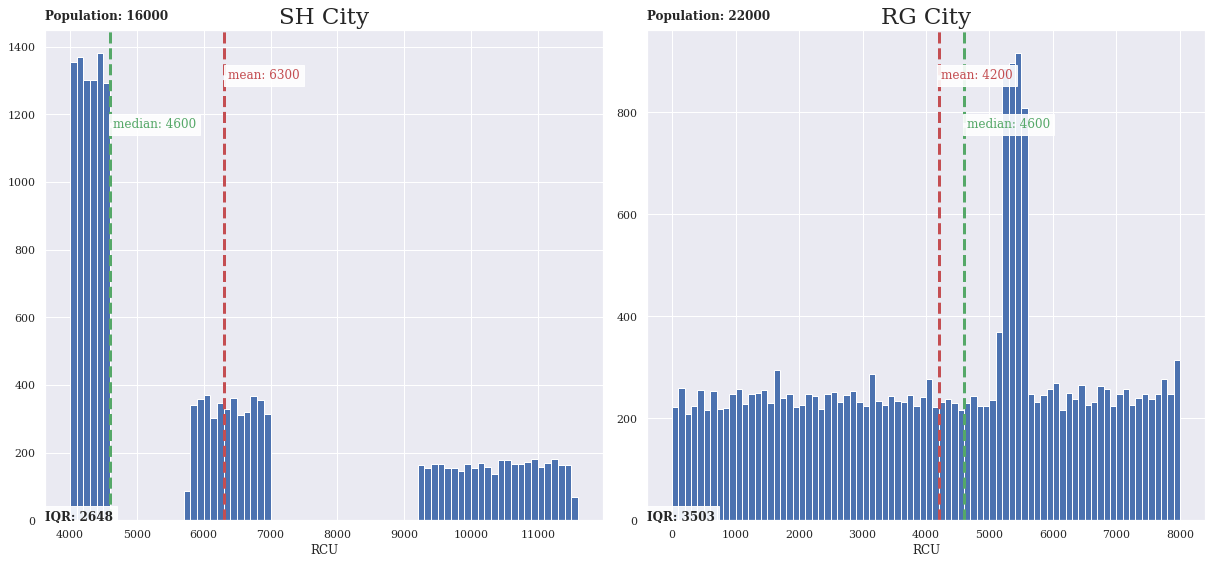

In [10]:
shA=city_dist(4000,7000,16000,6300,4600)
rgA=city_dist(0,8000,22000,4200,4600)
hist_plot(shA,rgA,'RCU')

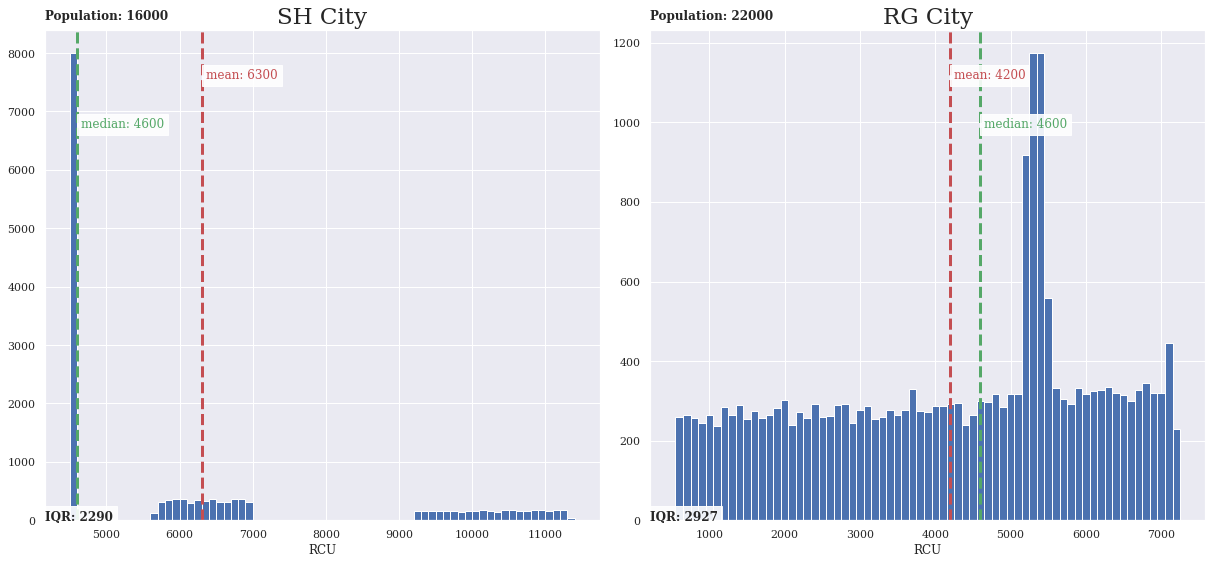

In [11]:
shB=city_dist(4500,7000,16000,6300,4600)
rgB=city_dist(550,7200,22000,4200,4600)
hist_plot(shB,rgB,'RCU')

##### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.|

SH has a higher variance :5235032 than the rent in RG: 4864261


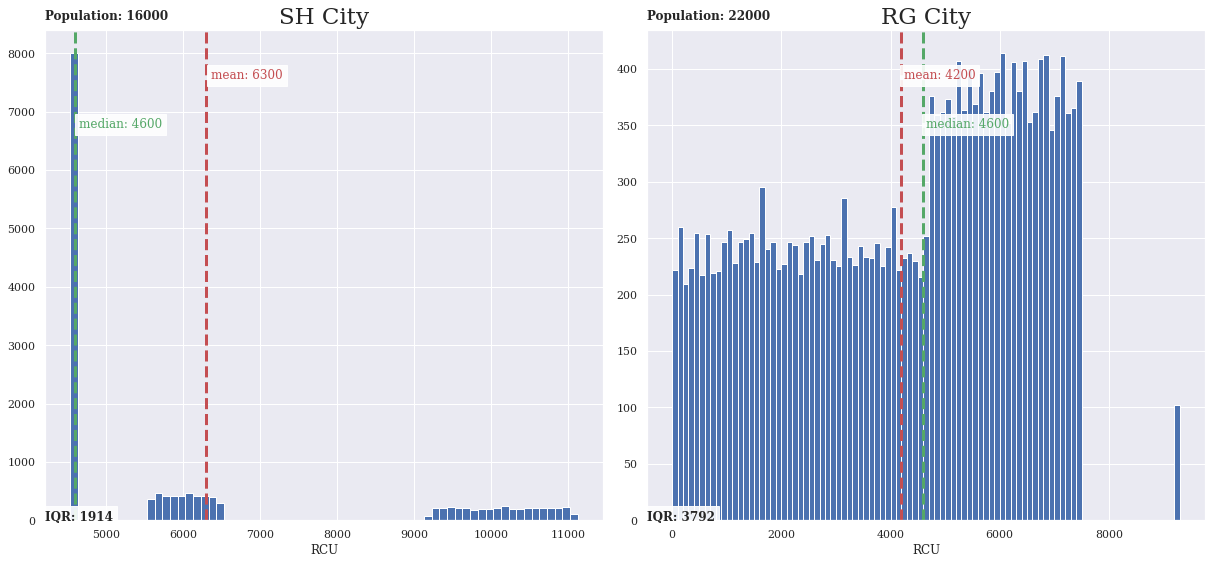

In [12]:
shC=city_dist(4530,6500,16000,6300,4600)
rgC=city_dist(0,7500,22000,4200,4600)
hist_plot(shC,rgC,'RCU')
if(np.var(shC)>np.var(rgC)):
    print(f"SH has a higher variance :{int(np.var(shC))} than the rent in RG: {int(np.var(rgC))}")

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

The covariance ratio is valid


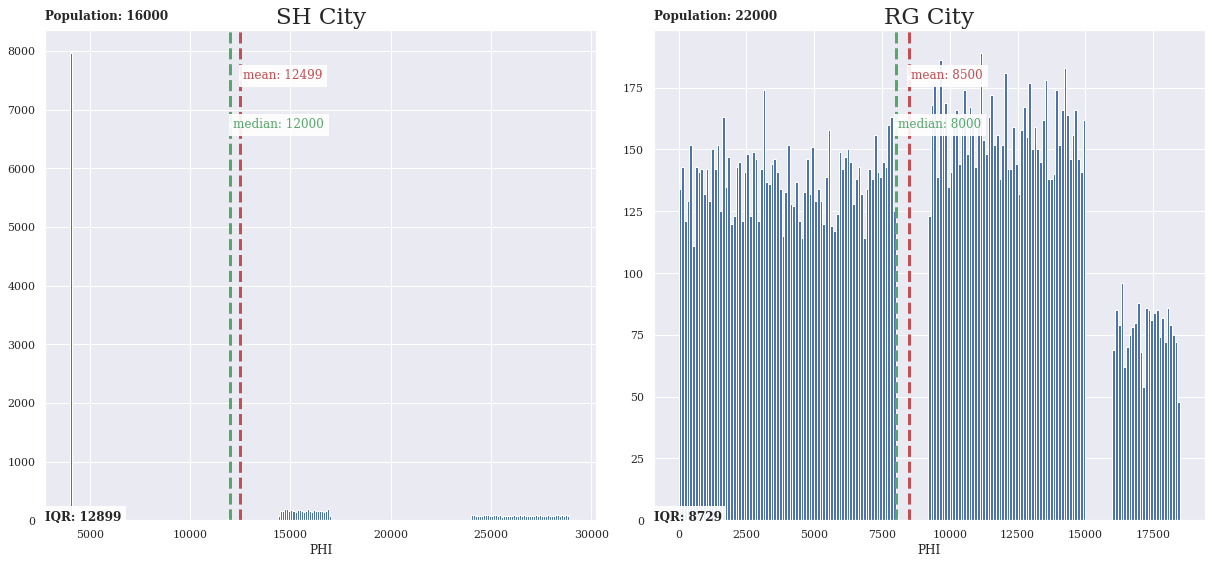

In [13]:
sh_PHI=shC.copy()*(12000/4600) ; i=1
while sh_PHI.mean()>12500:
    sh_PHI[i]=4000 ;i+=1 
rg_PHI=city_dist(0,15000,22000,8500,8000)
hist_plot(sh_PHI,rg_PHI,'PHI')
a=np.cov(shC,sh_PHI)[0,1]/(0.97*np.var(sh_PHI)**0.5*np.var(shC)**0.5)
b= np.cov(rgC,rg_PHI)[0,1]/(0.89*np.var(rg_PHI)**0.5*np.var(rgC)**0.5)
if 0.99<a<1.01 and 0.99<b<1.01:
    print("The covariance ratio is valid")

#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

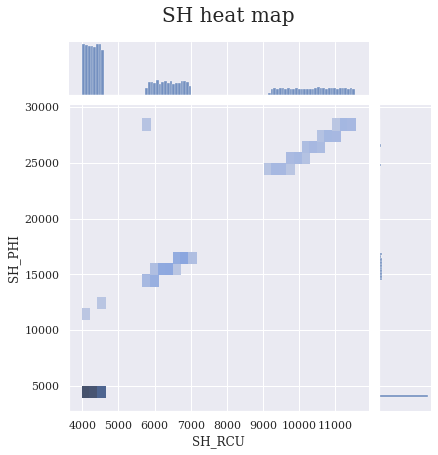

In [14]:
sh_df = pd.DataFrame(data = {'SH_RCU':shA, 'SH_PHI':sh_PHI});
g0=sns.jointplot(data=sh_df, x='SH_RCU', y="SH_PHI", kind="hist",marginal_kws=dict(bins=100));
plt.suptitle('SH heat map',size=20,y=1.05)
plt.show()


Text(0.5, 1.05, 'RG heat map')

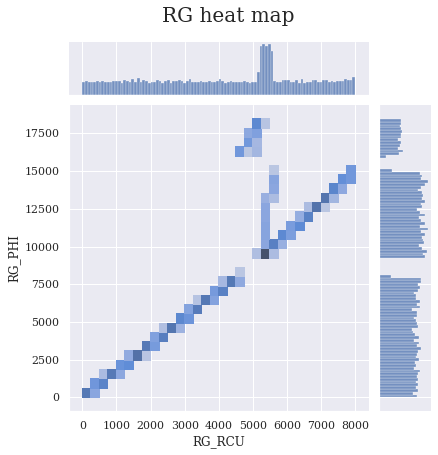

In [15]:
rg_df = pd.DataFrame(data = {'RG_RCU':rgA, 'RG_PHI':rg_PHI});
g1=sns.jointplot(data=rg_df, x='RG_RCU', y="RG_PHI", kind="hist", marginal_kws=dict(bins=100));
plt.suptitle('RG heat map',size=20,y=1.05)

### Question 3 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

#### Q3 Answer:


We can calculate the Variance of the sum of 3 RV as we saw in class:


\begin{align}
\ Var(X+Y+Z) = \\
\ = E((X+Y+Z)^2)-(E(X+Y+Z)^2) \\
\ = E(X^2 + 2XY + 2XZ + Y^2 +2YZ + Z^2) - (E(X)+E(Y)+E(Z))^2 \\
\end{align}

\begin{align}
\ = E(X^2) + E(2XY) + E(2XZ) + E(Y^2) + E(2YZ) + E(Z^2) - ( (E(X))^2 + 2E(X)*E(Y) + 2E(X)*E(Z) +E^2(Y) + 2E(Y)*E(Z) + E^2(Z)) \\
\end{align}

We'll replace the followings:

\begin{align}
\ Var(X) = E(X^2) - E^2(X)  \\
\ Var(Y) = E(Y^2) - E^2(Y)  \\
\ Var(Z) = E(Z^2) - E^2(Z)  \\
\end{align}

And we'll be left with

\begin{align}
\ =  Var(X) + Var(Y) + Var(Z) + E(2XY) + E(2XZ) + E(2YZ) - (2E(X)*E(Y) + 2E(X)*E(Z) + 2E(Y)*E(Z)) \\
\end{align}

We saw in class that

\begin{align}
\ Cov(X,Y) = E(X*Y) + E(X)*E(Y) \\
\end{align}

So we can implement it here and we'll get:

\begin{align}
\ Var(X+Y+Z) = Var(X) + Var(Y) + Var(Z) + 2Cov(X,Y) + 2Cov(Y,Z) + 2Cov(X,Z)  \\
\end{align}


We said in class that two RV's are called independent if for all x and y we have 
\begin{align}
\ P(X=x and Y=y) = P(X=x) * P(Y=y)   \\
\end{align}

and we also said that their Cov = 0. 

So if all two pairs (x,y; x,z; and y,z) are independent of each other then the variance of the sum is equal to the sum of the variances as follows:

\begin{align}
\ Var(X+Y+Z) = Var(X) + Var(Y) + Var(Z)  \\
\end{align}


If all 3 RV's are indepent of each other, than this is called pairwise independence. The definition is such that a finite set of 

\begin{align}
\ X_1, X_2, ... X_n  \\
\end{align}

random variables is pairwise independent if and only if every pair of random variables is independent.

We were asked if X,Y,Z are pairwise independent, are they necessarily collectively independent? The answer is no, and we will prove by an example. In general we can say that there could be a case in which we have pairwise independence, but not mutual independence between all RV's. That is possible if one of the RV's result is dependant on the other RV's results *together*. 

In detail:

The formal definition says that two RV's are independent if and only if 

\begin{align}
\ f(X=x   and   Y=y) = f(X=x) * f(Y=y)  \\
\end{align}

Suppose we have 2 fair dice X and Y, and an addiaitional dice that can't get 6 if the two previous dice sum to 12 (meaning that the possibility of receivnig 6 is 0), otherwise it is a fair dice.

so the probability of receiving 6 in each one of the dice is as follows:

\begin{align}
\ f(X=6) = 1/6 \\
\ f(Y=6) = 1/6 \\
\ f(Z=6) = 1/6 \\
\end{align}

Since Z is only dependant of the results of X and Y together, it is independant of their results seperately so:

\begin{align}
\ f(X=6 and Y=6) = 1/6 * 1/6 = 1/36 \\
\ f(X=6 and Z=6) = 1/6 * 1/6 = 1/36 \\
\ f(Y=6 and Z=6) = 1/6 * 1/6 = 1/36 \\
\end{align}

But together the probability of receiving 18 is:

\begin{align}
\ f(X=6 and Y=6 and Z=6) = 0 \\
\end{align}

and this is not equal to 

\begin{align}
\ f(X=6 and Y=6 and Z=6) = 1/6 * 1/6 * 1/6 = 1/216 \\
\end{align}

We can see that in this case each one of the dice is independent of the other two by themeselves, but they are depdendent *together* (mutual indepenence).

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [16]:
def nfoldconv(p,n):
    final=conv(p,n,p)
    for j in range(n-2):
        final=conv(p,n,final)
    return plotdist(final,n)

def conv(p,n,convold): 
    final = {}
    for i in range(len(convold[0])):
        for j in range(len(p[0])):   
            inx=int(convold[0][i]+p[0][j])
            if inx in final:
                final[inx]+=convold[1][i]*p[1][j]
            else:
                final[inx]=convold[1][i]*p[1][j]
    final=[list(final.keys()), list(final.values())]
    return final

def plotdist(final,n):
    df_dist=pd.DataFrame(data=final[1], index=final[0])
    ax=sns.barplot(x=df_dist.index, y=0, data=df_dist)
    ax.set(xlabel=f'Possible Results-{n} times', ylabel='probability')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=9)
    return df_dist.T

#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


,17,18,19,20,21,22,23,24,25,26,...,127,128,129,130,131,132,133,134,135,136
0,4.440892e-16,7.549517e-15,6.794565e-14,4.303224e-13,2.151612e-12,9.036771e-12,3.313483e-11,1.088716e-10,3.266072e-10,9.071348e-10,...,9.071348e-10,3.266072e-10,1.088716e-10,3.313483e-11,9.036771e-12,2.151612e-12,4.303224e-13,6.794565e-14,7.549517e-15,4.440892e-16


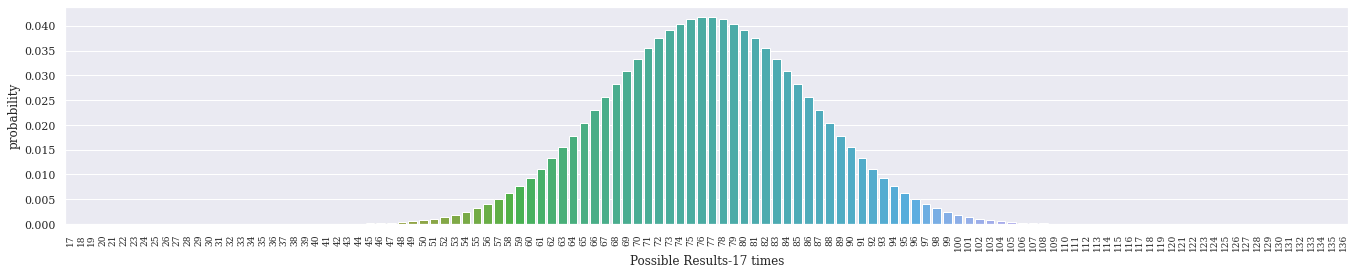

In [17]:
plt.rcParams['figure.figsize'] = (23.0,4.0) # set default size of plots
octahedron=np.array ([[1,2,3,4,5,6,7,8],[1/8,1/8,1/8,1/8,1/8,1/8,1/8,1/8]])
nfoldconv(octahedron, 17)

#### 4.C
Assume that the price of a stock changes in any given day according to (in NIS):

$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.3 & 0.15 & 0.15 & 0.15 & 0.25
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

,-2,-1,0,1,2,3,4,5,6
0,0.09,0.09,0.1125,0.135,0.2175,0.12,0.0975,0.075,0.0625


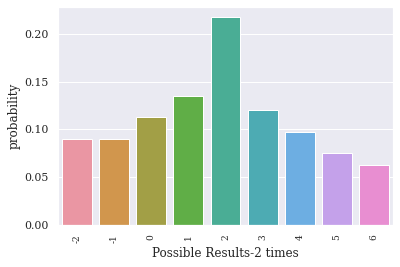

In [18]:
plt.rcParams['figure.figsize'] = (6.0,4.0) # set default size of plots
stock=np.array ([[-1,0,1,2,3],[0.3,0.15,0.15,0.15,0.25]])
nfoldconv(stock, 2)

,-5,-4,-3,-2,-1,0,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
0,0.00243,0.006075,0.01215,0.021262,0.038222,0.053738,0.070748,0.087202,0.104077,0.107198,...,0.099689,0.088608,0.068358,0.051708,0.036357,0.023367,0.01207,0.006445,0.00293,0.000977


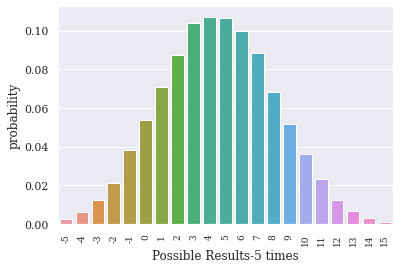

In [19]:
stock=np.array ([[-1,0,1,2,3],[0.3,0.15,0.15,0.15,0.25]])
after5=nfoldconv(stock, 5)
after5

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 4NIS? Explain your answers.

In [20]:
prob_for_more_than_7=np.sum(after5.iloc[0,13:])
print(f"1)'greater than' probability- sum off all the grater values; in that case, ths probabilties sum of 8-15 NIS is: \033[1m {round(prob_for_more_than_7,3)}\033[0m\n")
prob_for_less_than_4=np.sum(after5.iloc[0,0])
print(f"2) lost stictly more the is 'smaller than' probability- sum off all the smaller values; in that case, only -5 is smaller the -4; so: \033[1m {round(prob_for_less_than_4,3)}\033[0m\n")


1)'greater than' probability- sum off all the grater values; in that case, ths probabilties sum of 8-15 NIS is:  0.202

2) lost stictly more the is 'smaller than' probability- sum off all the smaller values; in that case, only -5 is smaller the -4; so:  0.002

